In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [74]:
import pandas as pd
from pathlib import Path
import pyarrow.parquet as pq

month = 8
year = 2024
path = Path("..") / "data" / "raw" / f"rides_{year}_{month:02}.parquet"

table = pq.read_table(path)
rides = table.to_pandas()
rides.head()

,rideable_type_duplicate_column_name_1,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,06967465A2A0ABD9,electric_bike,2024-08-11 13:40:50.958,2024-08-11 13:53:24.149,1 Ave & E 18 St,5854,W 20 St & 10 Ave,6306,40.733812,-73.980544,40.745686,-74.005141,member
1,electric_bike,8698B37420563CCC,electric_bike,2024-08-05 08:12:49.336,2024-08-05 08:48:03.320,W 181 St & Riverside Dr,8381,Hudson Blvd W & W 36 St,6611,40.851680,-73.941860,40.756765,-73.999714,member
2,electric_bike,E7CB10418EBA1F43,electric_bike,2024-08-09 13:39:16.596,2024-08-09 13:57:01.755,1 Ave & E 18 St,5854,Fulton St & Adams St,4637,40.733812,-73.980544,40.692418,-73.989495,member
3,electric_bike,25C23D06829C695C,electric_bike,2024-08-07 15:01:31.370,2024-08-07 15:08:41.839,Morris Ave & E 163 St,8036,Morris Ave & E 171 St,8209,40.827230,-73.917656,40.838990,-73.910900,member
4,classic_bike,D11FB08CCDC5E48F,classic_bike,2024-08-14 15:49:34.500,2024-08-14 15:54:04.601,82 St & Broadway,6132,Elmhurst Ave & Forley St,6240,40.742810,-73.882960,40.746150,-73.877630,member


In [75]:
rides_cp = rides.copy()
rides['started_at'] = pd.to_datetime(rides['started_at'])
rides['ended_at'] = pd.to_datetime(rides['ended_at'])
rides_cp["duration"] = rides["ended_at"] - rides["started_at"]
rides_cp.head()

,rideable_type_duplicate_column_name_1,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,electric_bike,06967465A2A0ABD9,electric_bike,2024-08-11 13:40:50.958,2024-08-11 13:53:24.149,1 Ave & E 18 St,5854,W 20 St & 10 Ave,6306,40.733812,-73.980544,40.745686,-74.005141,member,0 days 00:12:33.191000
1,electric_bike,8698B37420563CCC,electric_bike,2024-08-05 08:12:49.336,2024-08-05 08:48:03.320,W 181 St & Riverside Dr,8381,Hudson Blvd W & W 36 St,6611,40.851680,-73.941860,40.756765,-73.999714,member,0 days 00:35:13.984000
2,electric_bike,E7CB10418EBA1F43,electric_bike,2024-08-09 13:39:16.596,2024-08-09 13:57:01.755,1 Ave & E 18 St,5854,Fulton St & Adams St,4637,40.733812,-73.980544,40.692418,-73.989495,member,0 days 00:17:45.159000
3,electric_bike,25C23D06829C695C,electric_bike,2024-08-07 15:01:31.370,2024-08-07 15:08:41.839,Morris Ave & E 163 St,8036,Morris Ave & E 171 St,8209,40.827230,-73.917656,40.838990,-73.910900,member,0 days 00:07:10.469000
4,classic_bike,D11FB08CCDC5E48F,classic_bike,2024-08-14 15:49:34.500,2024-08-14 15:54:04.601,82 St & Broadway,6132,Elmhurst Ave & Forley St,6240,40.742810,-73.882960,40.746150,-73.877630,member,0 days 00:04:30.101000


In [76]:
rides_cp["duration"].describe().T

count                      4586537
mean     0 days 00:13:51.109278281
std      0 days 00:20:55.518818243
min         0 days 00:01:00.020000
25%         0 days 00:05:31.988000
50%         0 days 00:09:39.861000
75%         0 days 00:16:57.987000
max         1 days 00:58:39.410000
Name: duration, dtype: object

In [77]:
rides_cp["duration"].quantile(0)
rides_cp["duration"].quantile(0.01)
rides_cp["duration"].quantile(0.995)
rides_cp["duration"].quantile(0.999)

Timedelta('0 days 00:01:00.020000')

Timedelta('0 days 00:01:24.302000')

Timedelta('0 days 01:27:42.047440')

Timedelta('0 days 03:17:37.199504001')

In [78]:
duration_filter = (rides_cp["duration"] > pd.Timedelta(0)) & (rides_cp["duration"] <= pd.Timedelta(hours=5))
sum(~duration_filter)

2505

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='start_station_id'>

Text(0.5, 0, 'Start Station ID')

Text(0, 0.5, 'Number of Rides')

Text(0.5, 1.0, 'Top 10 Start Stations by Ride Count')

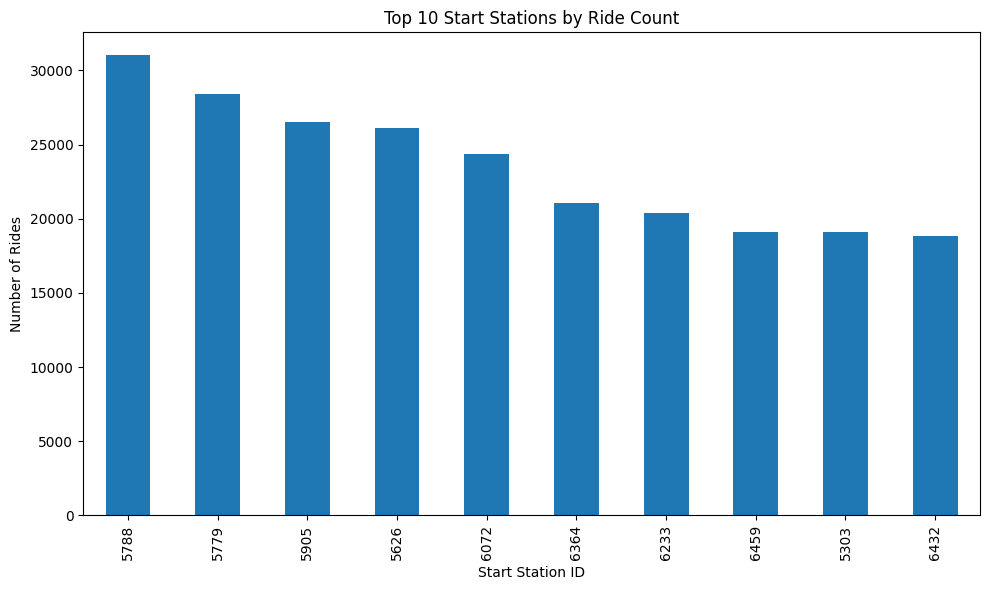

start_station_id
5788    31009
5779    28415
5905    26512
5626    26097
6072    24350
6364    21090
6233    20351
6459    19128
5303    19073
6432    18836
Name: count, dtype: int64

In [79]:
import matplotlib.pyplot as plt


top10 = rides_cp['start_station_id'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top10.plot(kind='bar')
plt.xlabel('Start Station ID')
plt.ylabel('Number of Rides')
plt.title('Top 10 Start Stations by Ride Count')
plt.tight_layout()
plt.show()
top10

### We only want data for top 5 locations

In [80]:
top5 = rides_cp['start_station_id'].value_counts().nlargest(5)
start_location_filter = rides_cp['start_station_id'].isin(top5.index)
rides_cp[start_location_filter].shape[0]
rides_cp[start_location_filter].shape[0]/rides_cp.shape[0]

136383

0.02973550633081124

In [81]:
filter_date_range = (rides_cp["started_at"] >= "2024-08-01") & (rides_cp["ended_at"] < "2024-09-01")
sum(~filter_date_range)
rides_cp[~filter_date_range].sort_values("ended_at").tail(10)

654

,rideable_type_duplicate_column_name_1,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
548741,classic_bike,FF27A25B18361B5A,classic_bike,2024-07-31 21:21:42.784,2024-08-01 12:32:14.727,Lafayette Ave & Ft Greene Pl,4470,Wyckoff St & 3 Ave,4290,40.687002,-73.976650,40.682755,-73.982586,member,0 days 15:10:31.943000
757364,classic_bike,B5A0FBA77C02447A,classic_bike,2024-07-31 21:49:56.732,2024-08-01 12:42:07.431,South St & Whitehall St,4846,Gold St & Frankfort St,5137,40.701221,-74.012342,40.710700,-74.003541,casual,0 days 14:52:10.699000
1534332,classic_bike,FD2C13A8C4A23B95,classic_bike,2024-07-31 22:09:24.732,2024-08-01 13:16:23.270,Plaza St East & Flatbush Ave,4010,Lincoln Pl & Nostrand Ave,3952,40.673134,-73.969106,40.670770,-73.950700,casual,0 days 15:06:58.538000
1632253,classic_bike,A3A11B3643D127B7,classic_bike,2024-07-31 21:21:27.197,2024-08-01 13:27:56.645,6 Ave & Broome St,5610,Lispenard St & Broadway,5391,40.724310,-74.004730,40.719392,-74.002472,member,0 days 16:06:29.448000
166506,classic_bike,C54FF3C8F5622A62,classic_bike,2024-07-31 21:03:43.718,2024-08-01 13:51:59.239,Lenox Ave & W 130 St,7753,Frederick Douglass Blvd & W 139 St,7876,40.810792,-73.943068,40.819006,-73.944769,casual,0 days 16:48:15.521000
1542575,classic_bike,97DA69AF0B0947B6,classic_bike,2024-07-31 13:31:49.109,2024-08-01 14:25:57.845,Menahan St & Seneca Ave,4963,Knickerbocker Ave & Hancock St,4663,40.704610,-73.910540,40.693850,-73.909740,casual,1 days 00:54:08.736000
1845248,classic_bike,F077F452D59BFBB2,classic_bike,2024-07-31 19:18:25.091,2024-08-01 15:18:56.567,Yankee Ferry Terminal,4440,Soissons Landing,4590,40.687066,-74.016756,40.692317,-74.014866,casual,0 days 20:00:31.476000
614998,classic_bike,B077BC1988849E74,classic_bike,2024-07-31 18:19:02.678,2024-08-01 15:38:40.237,W 21 St & 6 Ave,6140,7 Ave S & Bleecker St,5805,40.741740,-73.994156,40.732139,-74.003638,casual,0 days 21:19:37.559000
491999,electric_bike,6F5DD5C0E896855E,electric_bike,2024-07-31 21:06:32.297,2024-08-01 16:28:02.885,W 171 St & St Nicholas Ave,8262,Amsterdam Ave & W 136 St,7920,40.842941,-73.938631,40.819746,-73.951819,casual,0 days 19:21:30.588000
1497578,classic_bike,21C8ECEB40C3907B,classic_bike,2024-07-31 20:59:15.448,2024-08-01 17:40:01.149,Queens Blvd & 56 St,6158,Queens Blvd & 56 St,6158,40.741930,-73.909130,40.741930,-73.909130,casual,0 days 20:40:45.701000


All the rides are only logged once and are given on the basis of ride end time

In [82]:
final_filter = duration_filter & start_location_filter

In [83]:
rides = rides[final_filter]
member_casual_mapping = {
    "member": 1,
    "casual": 0
}

rideable_mapping = {
    "electric_bike": 1,
    "classic_bike": 0
}

rides["rideable_type"] = rides["rideable_type"].map(rideable_mapping)
rides["member_casual"] = rides["member_casual"].map(member_casual_mapping)

rides = rides[["started_at", "start_station_id", "rideable_type", "member_casual"]]
rides.head()
year = 2024
month = 8
path = Path("..") / "data" / "processed" / f"rides_{year}_{month:02}.parquet"
rides.to_parquet(path, index=False, engine="pyarrow")

,started_at,start_station_id,rideable_type,member_casual
42,2024-08-13 21:12:42.989,6072,1,1
44,2024-08-14 17:12:02.513,6072,0,1
63,2024-08-02 21:59:31.775,6072,1,1
121,2024-08-07 18:43:33.357,6072,1,1
130,2024-08-02 08:03:39.557,6072,0,1
